In [50]:
#import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import fiona
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
# Read in contract  csv file
contract_data = pd.read_csv("../IL_CEI/can-summer-2023/data/raw/contracts/illinois_bidbuy_contracts_as_of_20230614.csv")
# make the company name lower case
contract_data["Vendor"] = contract_data.Vendor.str.lower()
contract_data.head(3)

,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date
0,CIB6354390,NaN,Prescription Drugs,"caremarkpcs health, l.l.c.",B,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2015,06/30/2024
1,CIB5736630,NaN,ConnectYourCare - Flexible Spending,"connectyourcare, llc",A,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2019,06/30/2023
2,23-563WCC-WCC56-P-39787,NaN,Sole Source- WCRI CompScope Reports 23,wcri,D,$0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,08/15/2022,06/30/2023


In [156]:
# Split County Column for an easy merge with shape_data dataframe by removing the $ sign
contract_data[["Dollars Split", "Dollars Spent to Date"]] = contract_data["Dollars Spent to Date"].str.split('$', expand=True).astype(str)
contract_data.head(3)

,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date,Dollars Split
0,CIB6354390,NaN,Prescription Drugs,"caremarkpcs health, l.l.c.",B,0.00,CMS - Central Management Services,3PS - Sent,07/01/2015,06/30/2024,
1,CIB5736630,NaN,ConnectYourCare - Flexible Spending,"connectyourcare, llc",A,0.00,CMS - Central Management Services,3PS - Sent,07/01/2019,06/30/2023,
2,23-563WCC-WCC56-P-39787,NaN,Sole Source- WCRI CompScope Reports 23,wcri,D,0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,08/15/2022,06/30/2023,


In [157]:
#remove the , in the Dollars Spent to Date
contract_data['Dollars Spent to Date'] = contract_data['Dollars Spent to Date'].str.replace(',', '')

In [158]:
#convert the Dollars Spent to Date to float
contract_data['Dollars Spent to Date'] = contract_data['Dollars Spent to Date'].astype(float)

In [159]:
# confirming if things worked
type(contract_data['Dollars Spent to Date'][0])

contract_data['Dollars Spent to Date'].describe()

count    1.376000e+03
mean     9.647753e+05
std      6.617282e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.685315e+04
max      1.549670e+08
Name: Dollars Spent to Date, dtype: float64

In [160]:
#group the total contract by county
contract_data_groupby = contract_data.groupby('Organization').sum(numeric_only = True)[['Dollars Spent to Date']].reset_index()
contract_data_groupby
contract_data_groupby["Dollars Spent to Date"].describe()
#contract_data_groupby["Dollars Spent to Date"]

count    2.700000e+01
mean     4.916781e+07
std      1.511657e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.207790e+05
max      6.201873e+08
Name: Dollars Spent to Date, dtype: float64

In [161]:
# 

contract_data_groupby.sort_values('Dollars Spent to Date', inplace= True)
contract_data_groupby

,Organization,Dollars Spent to Date
0,ALPLM - Abraham Lincoln Presidential Library a...,0.000000e+00
24,SBE - State Board of Education,0.000000e+00
21,LOT - Lottery,0.000000e+00
19,ICC - Illinois Commerce Commission,0.000000e+00
18,HFS - Healthcare and Family Services,0.000000e+00
17,HDA - Housing Development Authority,0.000000e+00
16,FPR - Department of Financial and Professional...,0.000000e+00
15,EPA - Environmental Protection Agency,0.000000e+00
14,EMA - Emergency Management Agency,0.000000e+00
25,THA - Toll Highway Authority,0.000000e+00


In [ ]:
'''
Most of the Organizations have spent none of the Contract Value
CEI - Commission on Equity and Inclusion
'''

In [162]:
y = contract_data_groupby["Dollars Spent to Date"].sum()
y

1327530817.71

In [163]:

contract_data_groupby2 = contract_data_groupby[contract_data_groupby["Dollars Spent to Date"] >= 1.869625e+07]
contract_data_groupby2
#contract_data_groupby = contract_data_groupby[contract_data_groupby["Dollars Spent to Date"] > 6.670000e+03]
#contract_data_bar2

,Organization,Dollars Spent to Date
9,DOC - Corrections,1.869625e+07
20,ISP - Illinois State Police,2.454666e+07
4,CPOGS - CPO Office for General Services,1.632548e+08
3,CMS - Central Management Services,4.971484e+08
12,DoIT - Department of Innovation and Technology,6.201873e+08


In [164]:
contract_data_groupby2["Dollars Spent to Date"] = contract_data_groupby2["Dollars Spent to Date"]/100000

/tmp/ipykernel_729718/2902433789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_data_groupby2["Dollars Spent to Date"] = contract_data_groupby2["Dollars Spent to Date"]/100000


In [165]:
contract_data_groupby2

,Organization,Dollars Spent to Date
9,DOC - Corrections,186.962501
20,ISP - Illinois State Police,245.466554
4,CPOGS - CPO Office for General Services,1632.548317
3,CMS - Central Management Services,4971.483885
12,DoIT - Department of Innovation and Technology,6201.872783


In [130]:
1327530817.71*0.01

13275308.1771

In [131]:
1.869625e+07+1 # DOC - Corrections

18696251.0

In [132]:
6.670000e+03/1000

6.201873e+08/1000

620187.3

In [133]:
x =1.869625e+07+2.454666e+07 + 1.632548e+08 + 4.971484e+08 + 6.201873e+08
(x/y) * 100


99.72148234446429

In [147]:
#To get the total number of contracts
contract_data["Organization"].value_counts().sum()

# less than 1 percent will be plotted seperatedly and referred to as others
# other categories outside cms will be plotted

1376

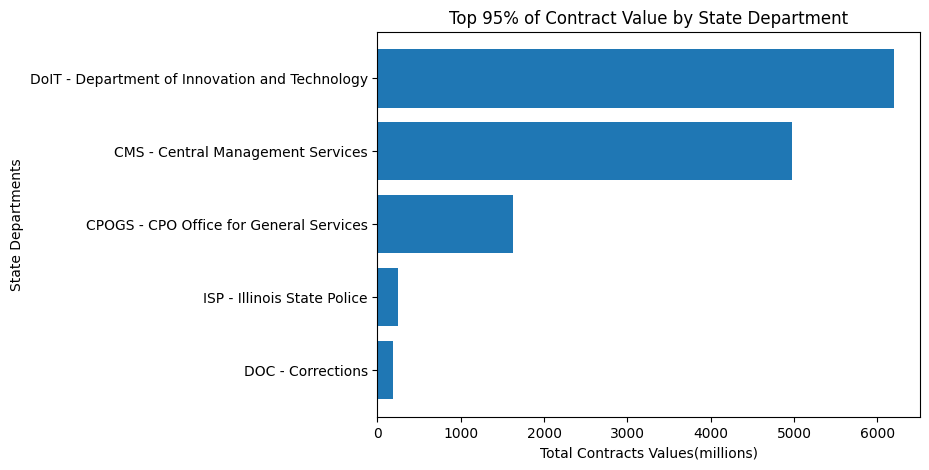

In [167]:
plt.figure(figsize=(7,5)) 
plt.barh(y = contract_data_groupby2['Organization'], width= contract_data_groupby2['Dollars Spent to Date'])
plt.xlabel('Total Contracts Values(millions)')                      # x-label added
plt.ylabel('State Departments')          # y-label added
plt.title('Top 95% of Contract Value by State Department')  # title added
plt.show()

In [ ]:
'''
CEI - Commission on Equity and Inclusion
'''